C:\Users\rahiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rahiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rahiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rahiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

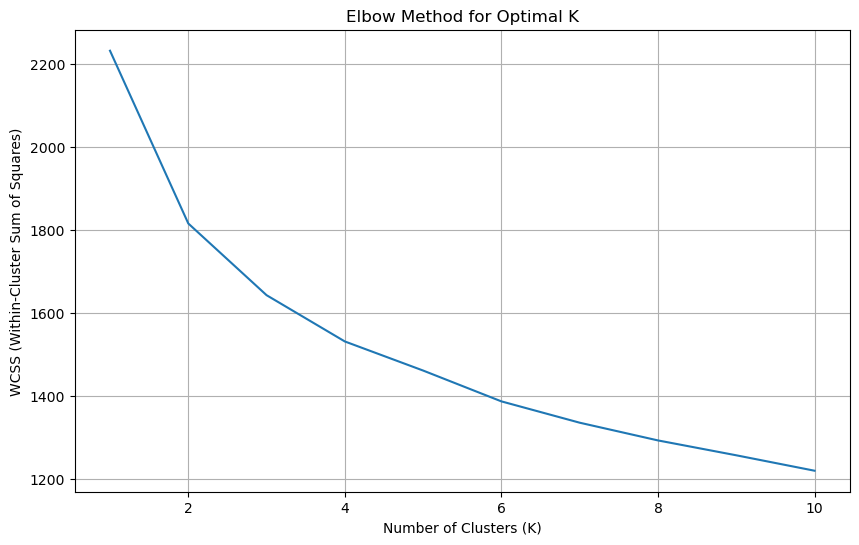

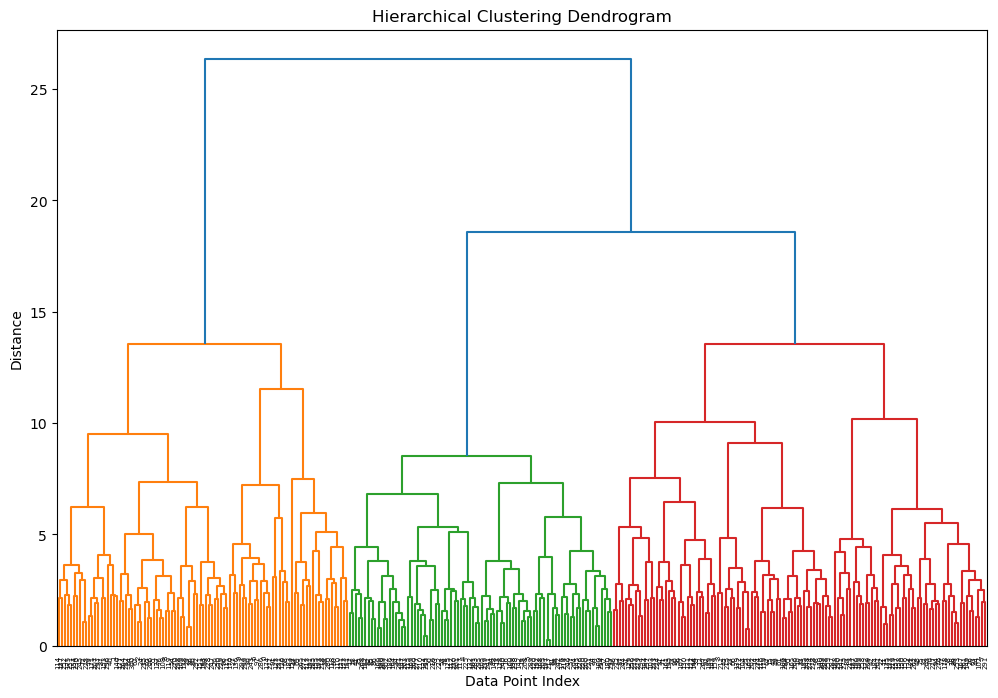

In [1]:
import sys
sys.path.append('../utils')
from data_prep import prepare_data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = prepare_data('../data/Heart_Disease.csv')

X_cluster = X.copy()

#K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Hierarchical Clustering
# Use a dendrogram to visualize the clustering structure
linked = linkage(X_cluster, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [2]:
y_binary = y.apply(lambda x: 0 if x == 0 else 1)

# Apply KMeans with the optimal number of clusters (e.g., k=2 from the elbow method)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add the cluster labels to your original dataframe
X_clustered = X.copy()
X_clustered['Cluster'] = kmeans.labels_
X_clustered['Actual_Labels'] = y_binary

# Compare the clusters with the actual labels using a crosstab
comparison_table = pd.crosstab(X_clustered['Cluster'], X_clustered['Actual_Labels'])
print("Comparison of K-Means Clusters vs. Actual Disease Labels:")
print(comparison_table)

Comparison of K-Means Clusters vs. Actual Disease Labels:
Actual_Labels    0    1
Cluster                
0               41  100
1              123   39


C:\Users\rahiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
